## Prove GD can work

* Consider 1D function and explain how GD can dec a function. From Taylor Expansion:

$$ f(x + \epsilon) = f(x) + \epsilon f'(x) + O(\epsilon^2) $$

* If you consider only first order approximation only first 2 terms prevails.

* Assume, $\epsilon = -\eta f'(x)$ ie small step moving in -ve direction

$$ f(x - \eta f'(x)) = f(x) - \eta f'^2(x) + O(\eta^2 f'^2(x))$$

* If $\eta$ is small higher order terms vanish and also we know $\eta f'^2(x)$ > 0, bcos $\eta$ + and square f'(x) + implies

$$ f(x - \eta f'(x)) <= f(x) $$

$$ x = x - \eta f'(x) $$

* In same lines, what if $\eta$ is high -> learning rate high implies we cant ignore the higher order terms -> we will increase the f(x) by that higher order amount
$$ f(x - \eta f'(x)) >= f(x) $$

* Thus with higher learning rates, we might not always keep dec the function value through gradients

## 1. GD in 1D

### 1.1 Convex Case

* Assume objective function $f(x) = x^2 ; f'(x) = 2x$

* We know f(x) is convex -> no local minima & the optimal value of f(x) is at 0

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda x : x**2 # Objective Function
gradf = lambda x : 2*x  # Derivative

def grad_desc(eta, init_val):
    x = init_val # Initial Value
    results = [x]
    for i in range(10):
        x -= eta*gradf(x)   # Update Gradients
        results.append(float(np.round(x, 2)))  # Store x values
    return results

In [3]:
# Small Learning Rates -> converging solution
res_low_lr = grad_desc(0.2, 10)
print(f"Low Learning Rate: {res_low_lr}")

# High Learning Rates -> oscillating/diverging solutions
res_high_lr = grad_desc(1.2, 10)
print(f"High Learning Rate: {res_high_lr}")

Low Learning Rate: [10, 6.0, 3.6, 2.16, 1.3, 0.78, 0.47, 0.28, 0.17, 0.1, 0.06]
High Learning Rate: [10, -14.0, 19.6, -27.44, 38.42, -53.78, 75.3, -105.41, 147.58, -206.61, 289.25]


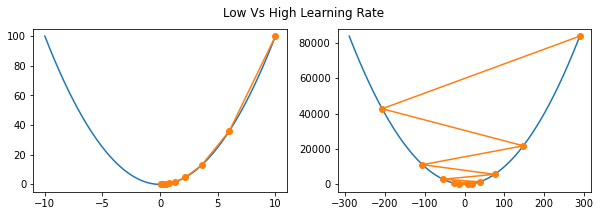

In [4]:
def plot_gd_update(results):
    plt.figure(figsize=(10, 3))
    plt.suptitle("Low Vs High Learning Rate")
    subplots = [121, 122]
    for result, subplot in zip(results, subplots):
        plt.subplot(subplot)
        n = max(abs(min(result)), abs(max(result)))  # Finding Max val in axis
        f_line = tf.range(-n, n, 0.1)         # Generating Smooth x axis range 
        plt.plot(f_line, [f(x) for x in f_line])  # Generate & plot function 
        plt.plot(result, [f(x) for x in result], marker='o')  # Plot the weight updates locations

plot_gd_update([res_low_lr, res_high_lr])

### 1.2 Non-Convex Case

* $ f(x) = x*cos(cx) $

* It has many local minima -> depending on learning rate we can end up in any local minima

In [5]:
c = tf.constant(0.15*np.pi)
f = lambda x : x*tf.cos(c*x)
gradf = lambda x : tf.cos(c * x) - c * x * tf.sin(c * x)

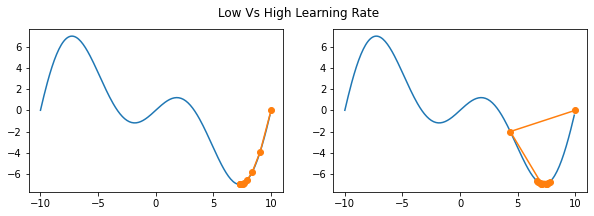

In [6]:
plot_gd_update([grad_desc(0.2, 10), grad_desc(1.2, 10)])

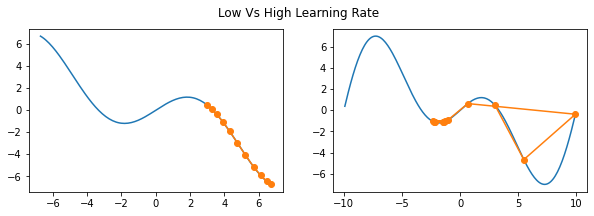

In [7]:
# Different solution with different initial point and solution unstable
plot_gd_update([grad_desc(0.2, 3), grad_desc(2, 3)])

## Summary

* Gradient Descent approach decreases a function through which we can find the optimal value of any function (loss function)

* Due to first order approximation in gradient calculation, the step size is important parameter in deciding the above behavior

* If low learning rate -> we will always encounter dec in function in each step -> bcos higher order terms vanish

* With high learning rate, high order terms cant be ignored -> grad desc doesnt always guarantee dec in function values

* Convex function -> no local minima -> high learning rates shall oscillate but can converge to optima

## 2. GD in 2D

* Similar to 1d case, we will calculate the gradient in multivariate case using 'd' partial derivatives

$$ \nabla f(x) = [\frac{\partial f(x)}{\partial x_1}, \frac{\partial f(x)}{\partial x_2}, ... , \frac{\partial f(x)}{\partial x_d}]^T $$

$$ f(x + \epsilon) = f(x) + \epsilon^T \nabla f(x) + O(||\epsilon||)^2 $$

* Direction of steepest descent ->  $-\nabla f(x)$ and with simlar analogy

$$ x = x - \eta \nabla f(x) $$

### Example

* 2D case : $ f(x) = x_1^2 + 2x_2^2 $
* Grad = $[2x_1, 4x_2] $

In [8]:
f = lambda x1, x2 : x1 ** 2 + 2 * x2 ** 2  # Function
gradf = lambda x1, x2 : (2 * x1, 4 * x2)   # Gradients

def grad_calc(x1, x2, eta):
    (g1, g2) = gradf(x1, x2)
    return (x1 - eta*g1, x2 - eta*g2)

def grad_desc(init_val, learning_rate):
    x1, x2 = init_val
    results = [(x1, x2)]
    for i in range(200):
        x1, x2 = grad_calc(x1, x2, learning_rate)
        results.append((x1, x2))
    return results

In [9]:
res_low_lr = grad_desc(init_val = [-15, -12], learning_rate = 0.05)
res_high_lr = grad_desc(init_val = [-15, -12], learning_rate = 0.35)

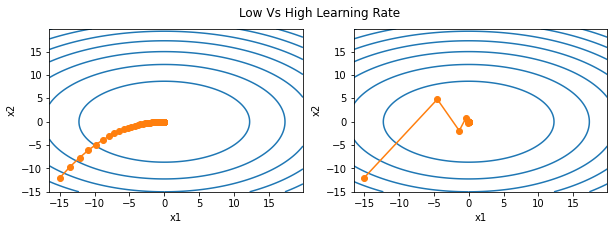

In [10]:
def plot_gd_update(results):
    plt.figure(figsize=(10, 3))
    plt.suptitle("Low Vs High Learning Rate")
    subplots = [121, 122]
    for result, subplot in zip(results, subplots):
        plt.subplot(subplot)
        x1, x2 = tf.meshgrid(tf.range(-16.5, 20.0, 0.1),
                          tf.range(-15.0, 20.0, 0.1))
        plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
        plt.plot(*zip(*result), '-o', color='#ff7f0e')
        plt.xlabel('x1')
        plt.ylabel('x2')

plot_gd_update([res_low_lr, res_high_lr])

## 3. Choosing right Learning rates : Hessians

* If we choose low -> takes time to converge, if high -> oscillates

* How to choose automatically?

* Second order methods looks at:
    * Function Value
    * Gradient Value
    * Curvature (which 1st order doesnt)

* Second order are computationally expensive to be applied in DL

 $$ f(x + \epsilon) = f(x) + \epsilon^T \nabla f(x) + \frac{1}{2}\epsilon^T \nabla \nabla^T f(x) \epsilon + O(||\epsilon||)^3 $$

* $\nabla \nabla^T f(x)$ is H (Hessian of f) : $d*d$ matrix


* It is too complex to compute, store and apply backprop on this is tedious

* Taking derivatives wrt $\epsilon$ -> $\nabla f(x) + H \epsilon = 0$ 

$$ \epsilon = -H^{-1}\nabla f(x) $$

* We need to invert H for optimization

### 3.1 Hessians Example

* Assume $f(x) = \frac{1}{2}x^2 $

* the min occurs at x = 0, the update has to $x = x - \hat x$ where $\hat x$ is x indeed. Single update is sufficient

* $\nabla = x;\  H = 1; \ \epsilon = -x $

* We dont need learning rate!

### Staright Forward Problem

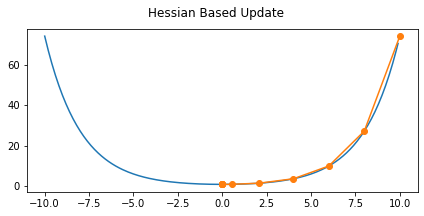

In [11]:
c = tf.constant(0.5)
f = lambda x: tf.cosh(c * x)  # Objective
gradf = lambda x: c * tf.sinh(c * x)  # Derivative
hessf = lambda x: c**2 * tf.cosh(c * x)  # Hessian

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * gradf(x) / hessf(x)
        results.append(float(x))
    return results

def plot_gd_update(result):
    plt.figure(figsize=(7, 3))
    plt.suptitle("Hessian Based Update")
    n = max(abs(min(result)), abs(max(result)))  # Finding Max val in axis
    f_line = tf.range(-n, n, 0.1)         # Generating Smooth x axis range 
    plt.plot(f_line, [f(x) for x in f_line])  # Generate & plot function 
    plt.plot(result, [f(x) for x in result], marker='o')  # Plot the weight updates locations

plot_gd_update(newton())

### Slightly Complex Problem

* H being - -> grad descent will increase the function value!!
* Check below

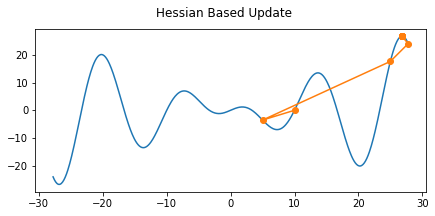

In [14]:
c = tf.constant(0.15 * np.pi)
f = lambda x: x * tf.cos(c * x)
gradf = lambda x: tf.cos(c * x) - c * x * tf.sin(c * x)
hessf = lambda x: - 2 * c * tf.sin(c * x) - x * c**2 * tf.cos(c * x)

plot_gd_update(newton())

### bring back learning rate

* This can be solved by taking absolute of H or brining back learning rate

* Bringing back learning rate implies we are cautious on curvature if long


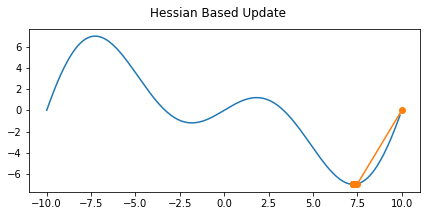

In [15]:
plot_gd_update(newton(0.5))